<a href="https://colab.research.google.com/github/SilvanaJ90/Silvana-Jaramillo_efRouting/blob/Silvana/Prueba_T%C3%A9cnica_efRouting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prueba Técnica: Analista de Datos**

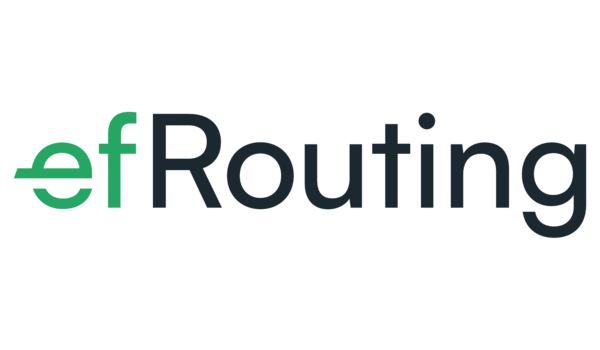

**Entendimiento de la prueba**

**Parte A: Indicadores en eltiempo**
En la industria logística, existen diversos indicadores de gestión operativa y analítica que permiten medir y evaluar diferentes aspectos del negocio, tales como eficiencia, cumplimiento, costos y tiempos de entrega. A continuación, se presentan 5 indicadores logísticos comúnmente utilizados en la industria, junto a una breve descripción:

*   **OTIF (%): On Time In Full.** Mide el porcentaje de entregas que fueron
realizadas a tiempo y en su totalidad, respecto al total comprometido. Es un
indicador clave de desempeño operativo y satisfacción del cliente.
*   **Lead Time promedio (días):**Tiempo promedio que transcurre desde que se
realiza un pedido hasta que se concreta la entrega. Es un reflejo de la
eficiencia del proceso logístico.
*   **Tasa de cumplimiento de entregas (%):** Porcentaje de entregas realizadas
efectivamente respecto al total planificado. Evalúa la confiabilidad de la
operación.
*   **Costo logístico por entrega (USD):** Gasto promedio incurrido en cada entrega,
incluyendo transporte, almacenamiento, personal y otros costos asociados.
*   **Número de entregas:**Cantidad total de entregas realizadas en el período.
Permite dimensionar la carga operativa y su evolución a lo largo del tiempo.

**Comprensión de los datos**

Se dispone de unos datos de panel de distintos indicadores a través del tiempo en este enlace: [data_panel_logistic](https://github.com/jcastillo-efr/data_public/blob/main/panel_indicadores_logisticos.csv#L4)

In [ ]:
# Librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Exploracion de los datos

url = "https://raw.githubusercontent.com/jcastillo-efr/data_public/main/panel_indicadores_logisticos.csv"
df = pd.read_csv(url, sep=',')
print(df.head())

        fecha  otif  lead_time  cumplimiento  costo_entrega  entregas
0  2023-01-01  96.0        4.7          92.5           7.93      1510
1  2023-02-01  94.7        5.1          94.9           9.00      1597
2  2023-03-01  96.3        4.4          91.3           8.36      1430
3  2023-04-01  98.0        5.2          97.2           7.35      1467
4  2023-05-01  94.5        4.7          90.7           8.36      1461


In [ ]:
df = pd.DataFrame(df)
df.head()

,fecha,otif,lead_time,cumplimiento,costo_entrega,entregas
0,2023-01-01,96.0,4.7,92.5,7.93,1510
1,2023-02-01,94.7,5.1,94.9,9.00,1597
2,2023-03-01,96.3,4.4,91.3,8.36,1430
3,2023-04-01,98.0,5.2,97.2,7.35,1467
4,2023-05-01,94.5,4.7,90.7,8.36,1461


In [ ]:
df.describe()

,otif,lead_time,cumplimiento,costo_entrega,entregas
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,94.708333,4.866667,94.225000,8.048750,1494.208333
std,1.931189,0.442981,2.784468,1.001752,94.440218
min,91.200000,4.000000,90.000000,5.380000,1308.000000
25%,93.725000,4.575000,91.675000,7.495000,1460.250000
50%,94.500000,4.850000,94.050000,8.090000,1495.000000
75%,96.025000,5.100000,96.675000,8.587500,1526.000000
max,98.200000,5.900000,98.900000,9.560000,1746.000000


In [ ]:
df.columns

Index(['fecha', 'otif', 'lead_time', 'cumplimiento', 'costo_entrega',
       'entregas'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fecha          24 non-null     object 
 1   otif           24 non-null     float64
 2   lead_time      24 non-null     float64
 3   cumplimiento   24 non-null     float64
 4   costo_entrega  24 non-null     float64
 5   entregas       24 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.3+ KB


In [ ]:
df.shape

(24, 6)

In [ ]:
# Procesamiento de los datos

# Fecha

df['fecha'] = pd.to_datetime(df['fecha'])
print(df.head())

       fecha  otif  lead_time  cumplimiento  costo_entrega  entregas
0 2023-01-01  96.0        4.7          92.5           7.93      1510
1 2023-02-01  94.7        5.1          94.9           9.00      1597
2 2023-03-01  96.3        4.4          91.3           8.36      1430
3 2023-04-01  98.0        5.2          97.2           7.35      1467
4 2023-05-01  94.5        4.7          90.7           8.36      1461


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   fecha          24 non-null     datetime64[ns]
 1   otif           24 non-null     float64       
 2   lead_time      24 non-null     float64       
 3   cumplimiento   24 non-null     float64       
 4   costo_entrega  24 non-null     float64       
 5   entregas       24 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 1.3 KB


In [ ]:
df['fecha'][0]

Timestamp('2023-01-01 00:00:00')

**Desarrollar**

1. Calcular, para cada uno, la diferencia relativa porcentual mes a mes y
comente sobre los resultados que obtiene.
2. Graficar las series de tiempo individuales y plantear una visualización de las diferencias relativas
3. ¿Es posible predecir el comportamiento en el próximo mes o año de cada uno
de los indicadores? argumente
4. Diseñe e implemente un sistema de monitoreo de estos indicadores y una
posible alerta que se emita el próximo mes al último mes del panel.¿Cómo mantendría en producción este sistema?

In [ ]:
# 1 Calcular, para cada uno, la diferencia relativa porcentual mes a mes y comente sobre los resultados que obtiene.

# Selecciona las columnas numericas
columnas_numericas = df.select_dtypes(include=['number']).columns

# Calcula el RPD para cada columna numérica
df_rpd = df[columnas_numericas].pct_change() * 100
df_rpd = df_rpd.round(2)

# Indica la fecha
df_rpd = df[['fecha']].join(df_rpd)

# Muestra los resultados
print(df_rpd)


        fecha  otif  lead_time  cumplimiento  costo_entrega  entregas
0  2023-01-01   NaN        NaN           NaN            NaN       NaN
1  2023-02-01 -1.35       8.51          2.59          13.49      5.76
2  2023-03-01  1.69     -13.73         -3.79          -7.11    -10.46
3  2023-04-01  1.77      18.18          6.46         -12.08      2.59
4  2023-05-01 -3.57      -9.62         -6.69          13.74     -0.41
5  2023-06-01  0.00       4.26          9.04          14.11     -7.32
6  2023-07-01  3.92      -4.08         -1.92         -16.56     13.00
7  2023-08-01 -1.73      25.53         -5.36          20.10     -0.26
8  2023-09-01 -2.49     -15.25         -1.96         -43.72     -1.64
9  2023-10-01  2.13     -10.00          8.11          63.94     -1.60
10 2023-11-01 -2.08      20.00         -0.92          -8.28     -8.06
11 2023-12-01  0.00     -18.52          0.21          -4.82      7.36
12 2024-01-01  1.49      15.91          0.31           5.06      0.55
13 2024-02-01 -4.50 

Se puede observar que las entregas a tiempo y en su totalidad  fluctúa significativamente mes a mes, con variaciones positivas y negativas, hay meses como junio de 2023 y diciembre de 2023 donde no hay variaciòn, hay grandes fluctuacones por ejemplo en septiembre de 2024 a octubre 2024 esto puede reflejar que hubo problemas en las entregas, problemas estacionales, problemas de logistica, se debe investigar que factores influyen en el desempeño de las entregas a tiempo y en su totalidad


Se nota que en el mes 2 de 2023 hubo un incremento en los tiempos de entrega en 8.51%, en el mes 3 bajo mucho ese porcentaje en tiempo de entrega, el el siguiente mes aumento positivamente esse porcentaje, en general en el año 2023 se nota una alta variabilidad mes a mes en los tiempos de entrega lo que puede indicar problemas de operacion, de clima etc.
En el año 2024 se observa que hubo un aumento positivo del 15.91% en el mes de enero con relacion al mes de diciembre, sin embargo en febrero baja significativamente ese porcentaje, en los siguientes tres meses permanece un aumento no considerable pero positivo en los tiempos de entrega, en los siguientes cuatro meses un porcentaje negativo en los tiempos de entrega, mas notorio en el mes de septiembre, esto puede ser causa de estacionalidades ya que es notorio en algunas partes del año el aumento o desenso de este porcentaje


El sistema logístico muestra signos de alta variabilidad operativa, especialmente en Lead Time y Costos.
la variaciòn en load time puede ser por temas estacionales, en costos de entrega hay gran aumento de desenso significativo del promedio por ejemplo marzo 2023, junio de 2024, septiembre de 2024, como tambien aumentos considerables como julio de 2023, diciembre e 2024, se puede establecer una alerta cuando el rpd supere el promedio en desenso de cualquier variable, quisas un promedio crictico -10.
Se deben monitoriar los meses donde es notable las variaciones como como septiembre y diciembre
Revisar estos datos con eventos externos como las estaciones del clima, temporadas altas etc


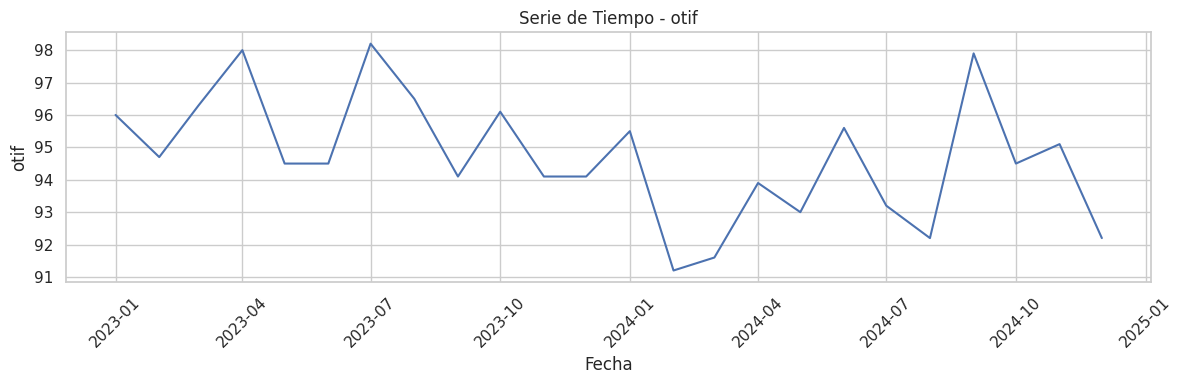

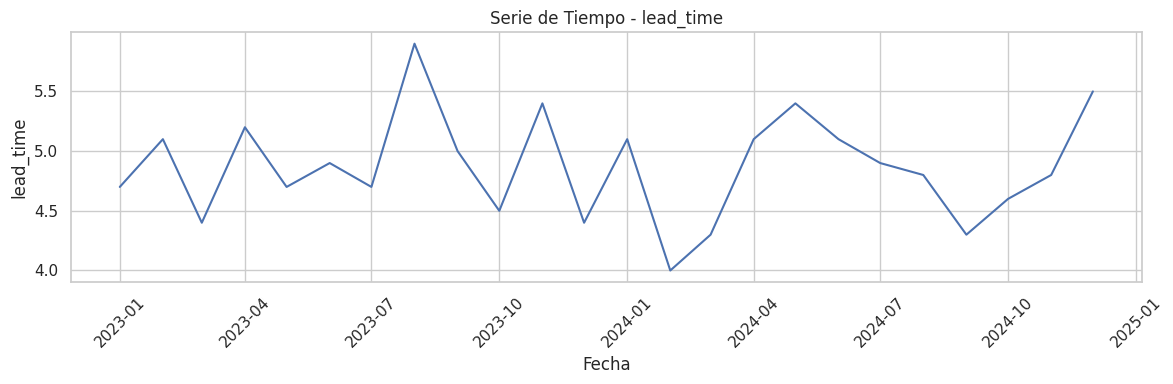

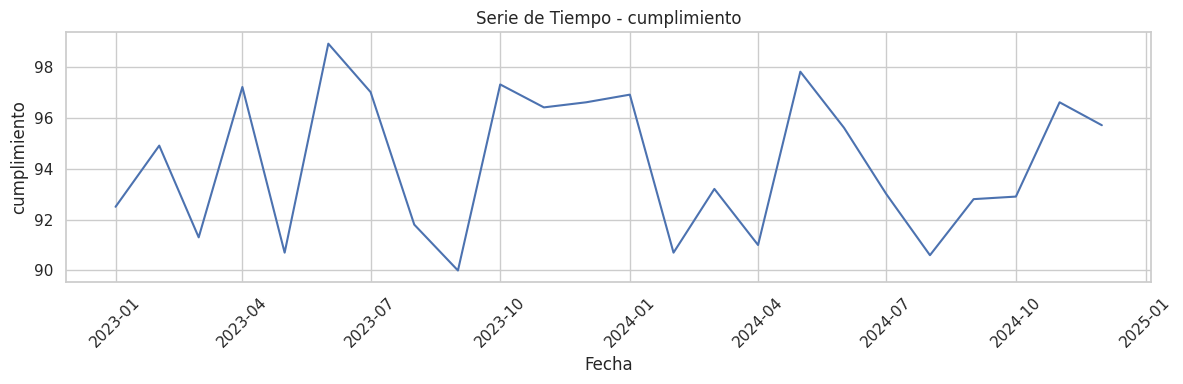

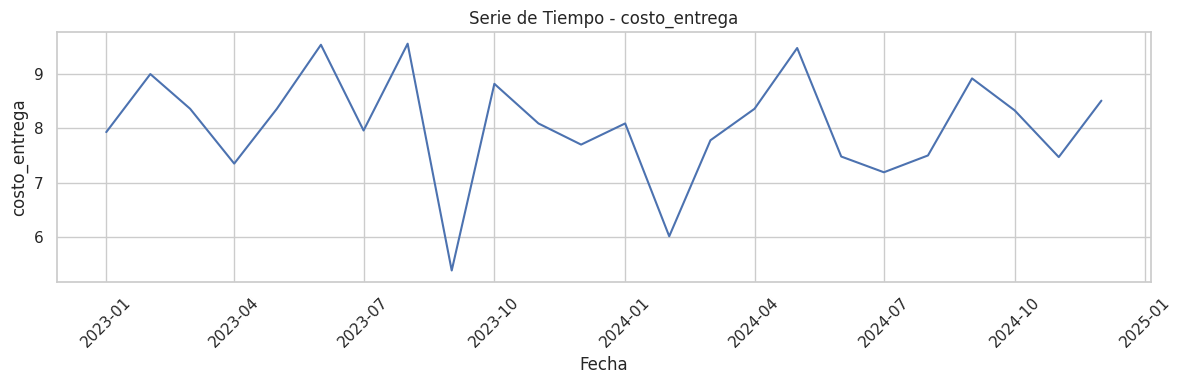

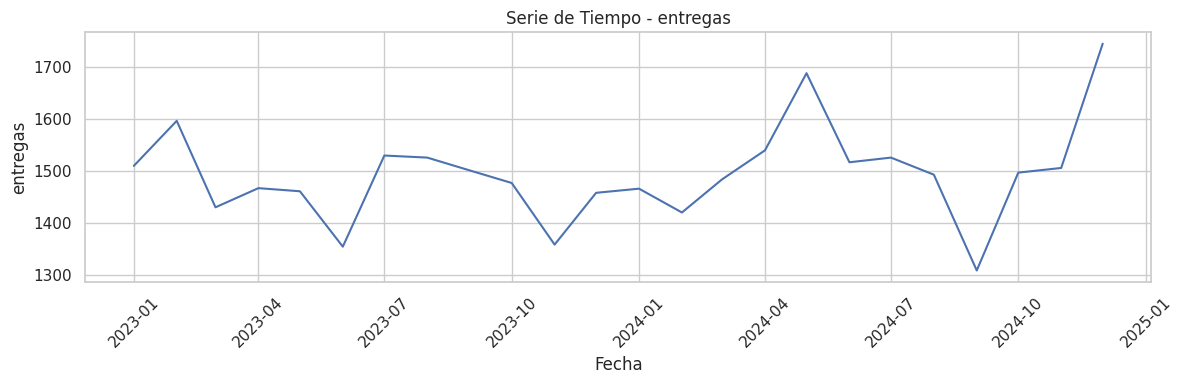

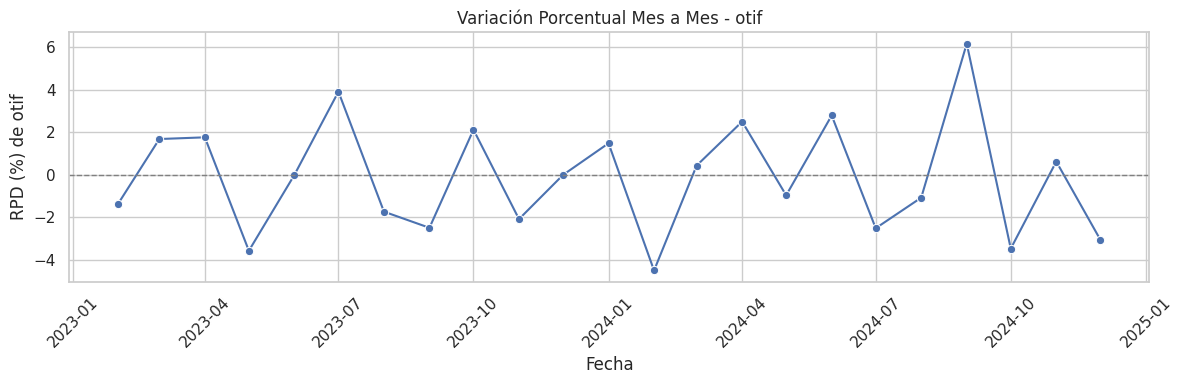

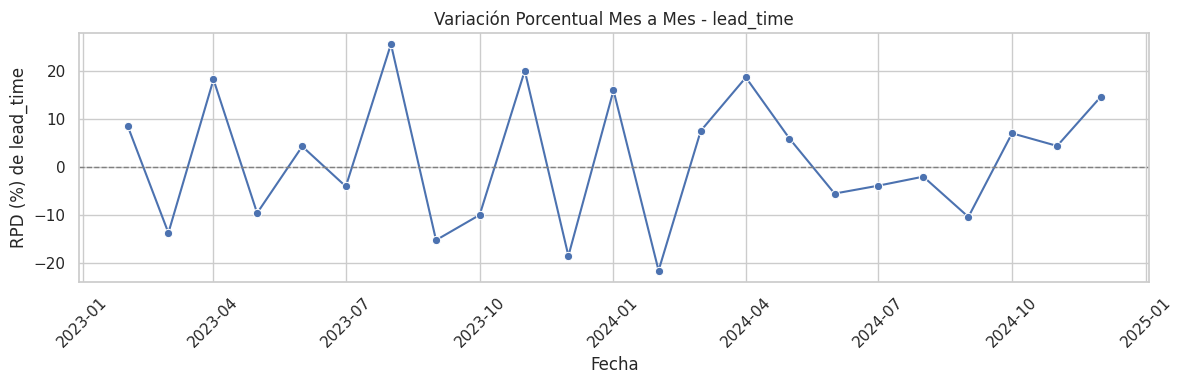

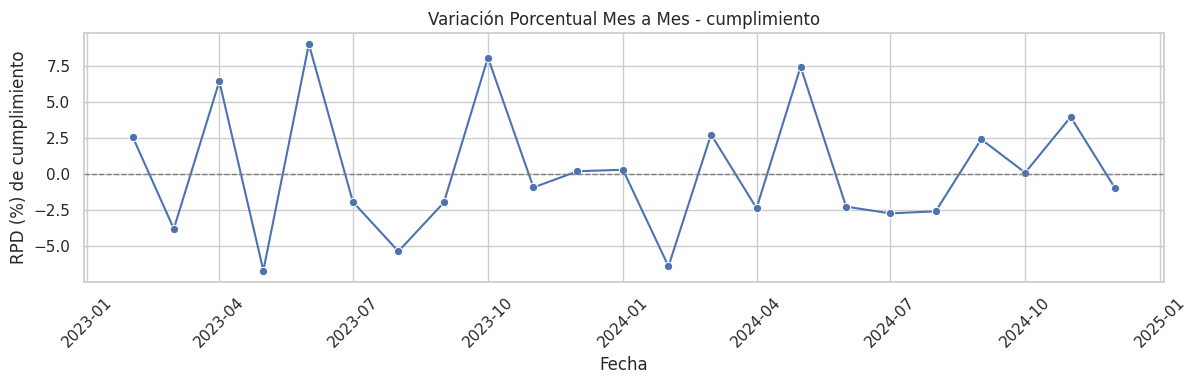

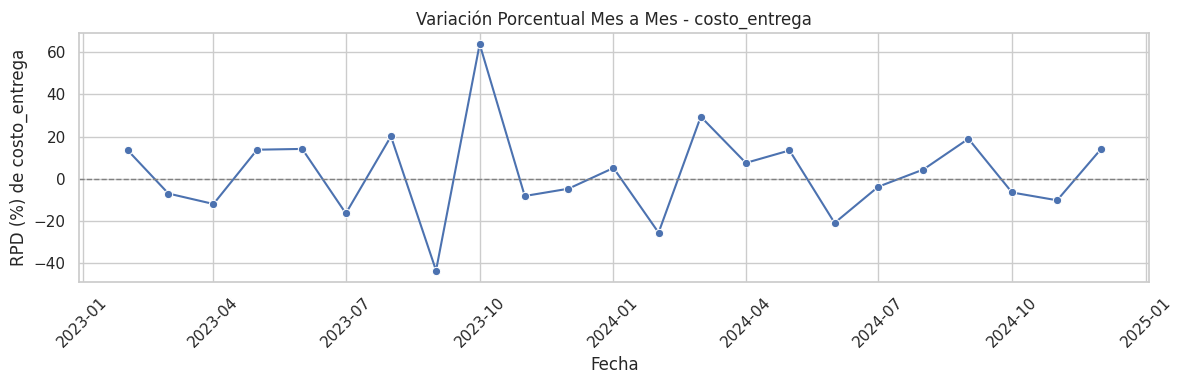

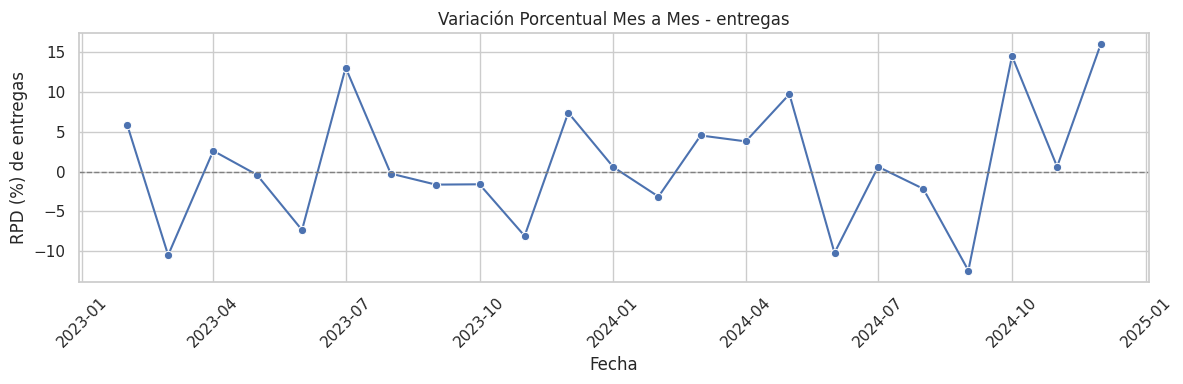

In [ ]:
# 2. Graficar las series de tiempo individuales y plantear una visualización de las diferencias relativas


# Estilo
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 4)

# Graficar series originales
for var in columnas_numericas:
    plt.figure()
    sns.lineplot(x='fecha', y=var, data=df)
    plt.title(f'Serie de Tiempo - {var}')
    plt.xlabel('Fecha')
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Graficar variaciones (RPD)
for var in columnas_numericas:
    plt.figure()
    sns.lineplot(x='fecha', y=var, data=df_rpd, marker='o')
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.title(f'Variación Porcentual Mes a Mes - {var}')
    plt.xlabel('Fecha')
    plt.ylabel(f'RPD (%) de {var}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

3. ¿Es posible predecir el comportamiento en el próximo mes o año de cada uno
de los indicadores? argumente

Si, se puede predecir, solo que no se cuenta con muchos datos, la informacion es muy variable, de pronto usar datos mas estables, se puede identificar patrones y predecir el conportamiento del proximo mes

4. Diseñe e implemente un sistema de monitoreo de estos indicadores y una
posible alerta que se emita el próximo mes al último mes del panel.¿Cómo mantendría en producción este sistema?